# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [8]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [11]:
%%R -o df
 
# Import data with R
df <- read_csv('joined_data.csv', show_col_types = FALSE)

# Print the column names
names(df)

 [1] "GEOID"                  "NAME"                   "med_age_estimate"      
 [4] "med_age_asian_estimate" "population_estimate"    "med_inc_estimate"      
 [7] "asian_estimate"         "med_age_moe"            "med_age_asian_moe"     
[10] "population_moe"         "med_inc_moe"            "asian_moe"             
[13] "asian_pct"              "activity_year"          "loan_type"             
[16] "loan_purpose"           "loan_amount"            "income"                
[19] "property_value"         "applicant_race.1"       "co.applicant_race.1"   
[22] "applicant_sex"          "co.applicant_sex"       "applicant_age"         
[25] "co.applicant_age"      


In [12]:
df

,GEOID,NAME,med_age_estimate,med_age_asian_estimate,population_estimate,med_inc_estimate,asian_estimate,med_age_moe,med_age_asian_moe,population_moe,...,loan_purpose,loan_amount,income,property_value,applicant_race.1,co.applicant_race.1,applicant_sex,co.applicant_sex,applicant_age,co.applicant_age
1,3.600100e+10,Census Tract 1; Albany County; New York,30.6,35.7,2259.0,44547.0,30.0,9.3,36.5,512.0,...,1.0,105000.0,35.0,175000,3.0,8.0,2.0,5.0,8888,9999
2,3.600100e+10,Census Tract 1; Albany County; New York,30.6,35.7,2259.0,44547.0,30.0,9.3,36.5,512.0,...,1.0,175000.0,24.0,Exempt,5.0,8.0,1.0,5.0,45-54,9999
3,3.600100e+10,Census Tract 1; Albany County; New York,30.6,35.7,2259.0,44547.0,30.0,9.3,36.5,512.0,...,1.0,195000.0,118.0,Exempt,5.0,8.0,1.0,5.0,<25,9999
4,3.600100e+10,Census Tract 1; Albany County; New York,30.6,35.7,2259.0,44547.0,30.0,9.3,36.5,512.0,...,1.0,175000.0,37.0,175000,3.0,8.0,2.0,5.0,25-34,9999
5,3.600100e+10,Census Tract 1; Albany County; New York,30.6,35.7,2259.0,44547.0,30.0,9.3,36.5,512.0,...,1.0,155000.0,115.0,205000,6.0,8.0,1.0,5.0,35-44,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174062,3.612315e+10,Census Tract 1505.02; Yates County; New York,47.8,NaN,2587.0,70179.0,0.0,2.1,NaN,281.0,...,1.0,645000.0,300.0,995000,5.0,8.0,1.0,5.0,35-44,9999
174063,3.612315e+10,Census Tract 1505.02; Yates County; New York,47.8,NaN,2587.0,70179.0,0.0,2.1,NaN,281.0,...,1.0,1005000.0,NaN,2205000,7.0,7.0,4.0,4.0,8888,8888
174064,3.612315e+10,Census Tract 1505.02; Yates County; New York,47.8,NaN,2587.0,70179.0,0.0,2.1,NaN,281.0,...,1.0,795000.0,NaN,995000,7.0,7.0,4.0,4.0,8888,8888
174065,3.612315e+10,Census Tract 1505.02; Yates County; New York,47.8,NaN,2587.0,70179.0,0.0,2.1,NaN,281.0,...,1.0,405000.0,NaN,485000,7.0,7.0,4.0,4.0,8888,8888


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




In [19]:
df = pd.read_csv('joined_data.csv')
df.med_inc_estimate.isna().value_counts()

med_inc_estimate
False    173511
True        555
Name: count, dtype: int64

`geom_smooth()` using formula = 'y ~ x'


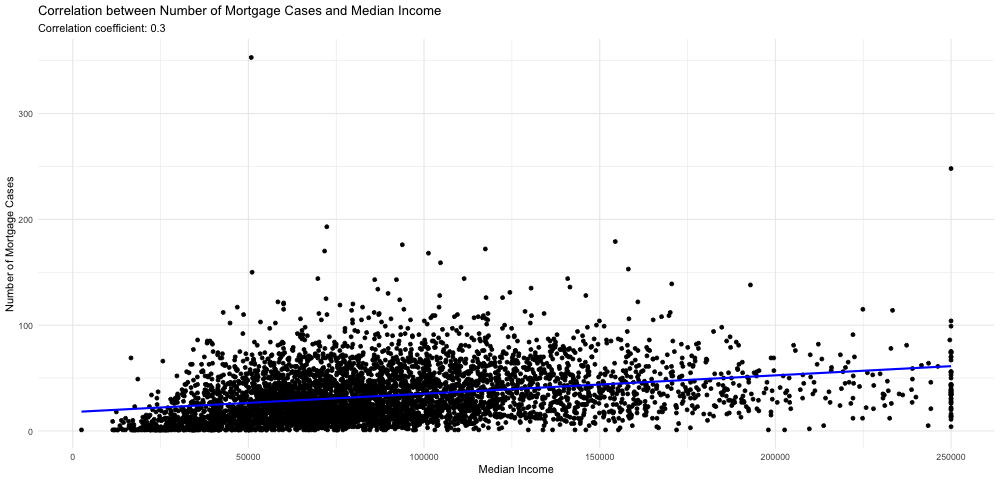

In [20]:
%%R -w 1000

# Ensure median_income is treated as numeric
summary_data$median_income <- as.numeric(summary_data$median_income)

# Create a scatter plot
ggplot(summary_data, aes(x = median_income, y = case_count)) +
  geom_point() +  # Add points
  theme_minimal() +  # Use a minimal theme
  labs(x = "Median Income", y = "Number of Mortgage Cases",
       title = "Correlation between Number of Mortgage Cases and Median Income",
       subtitle = paste("Correlation coefficient:", round(cor(summary_data$case_count, summary_data$median_income, use = "complete.obs"), 2))) +
  geom_smooth(method = "lm", se = FALSE, color = "blue")  # Add a linear regression line without the standard error

In [25]:
%%R

# Remove rows where property_value is NA
clean_mortgage_data <- df %>%
  mutate(property_value = as.numeric(property_value)) %>%  # Convert property_value to numeric
  filter(!is.na(property_value) & property_value != Inf & property_value != -Inf)  # Remove NA and Inf values

# Summarize data
summary_data <- clean_mortgage_data %>%
  group_by(GEOID) %>%
  summarize(case_count = n(),
            avg_property_value = mean(property_value))  

# Calculate the correlation
correlation_result <- cor(summary_data$case_count, summary_data$avg_property_value, use = "complete.obs")
print(correlation_result)

[1] -0.1284276


In addition: Warning message:
There was 1 warning in `mutate()`.
ℹ In argument: `property_value = as.numeric(property_value)`.
Caused by warning:
! NAs introduced by coercion 


`geom_smooth()` using formula = 'y ~ x'


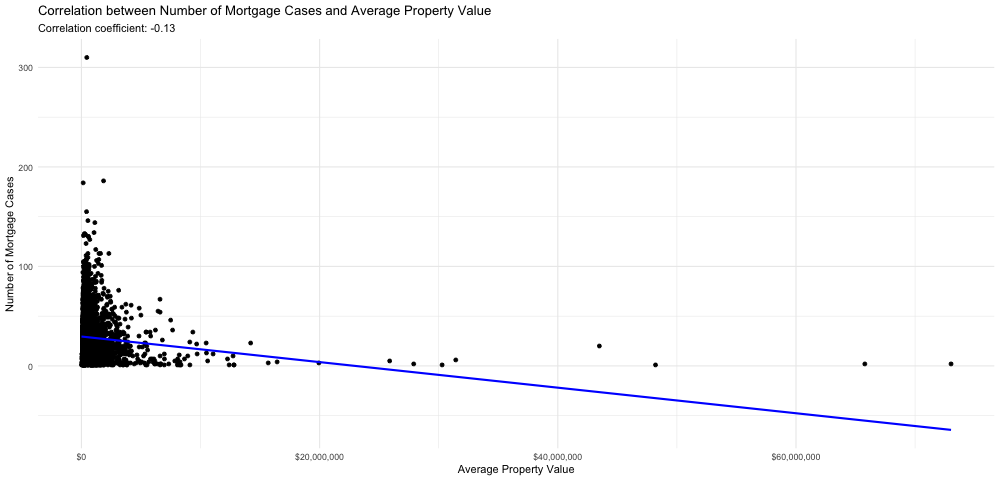

In [29]:
%%R -w 1000

ggplot(summary_data, aes(x = avg_property_value, y = case_count)) +
  geom_point() +
  theme_minimal() +
  labs(x = "Average Property Value", y = "Number of Mortgage Cases",
       title = "Correlation between Number of Mortgage Cases and Average Property Value",
       subtitle = paste("Correlation coefficient:", round(correlation_result, 2))) +
       geom_smooth(method = "lm", se = FALSE, color = "blue")+
           scale_x_continuous(labels = scales::dollar)  # Add a linear regression line without the standard error
       

`geom_smooth()` using formula = 'y ~ x'


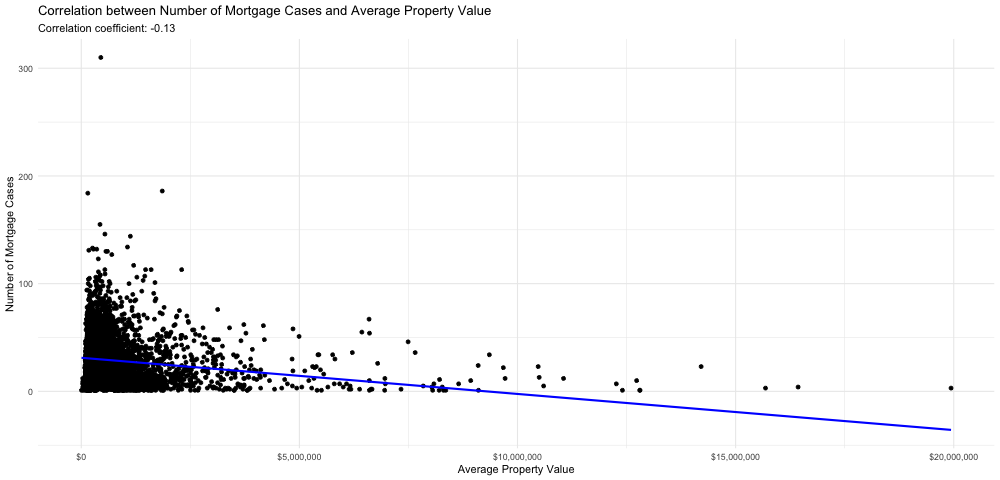

In [30]:
%%R -w 1000

# Exclude property_value higher than 20 million
summary_data <- summary_data %>%
  filter(avg_property_value < 20000000)

# Create a scatter plot
ggplot(summary_data, aes(x = avg_property_value, y = case_count)) +
  geom_point() +
  theme_minimal() +
  labs(x = "Average Property Value", y = "Number of Mortgage Cases",
       title = "Correlation between Number of Mortgage Cases and Average Property Value",
       subtitle = paste("Correlation coefficient:", round(correlation_result, 2))) +
       geom_smooth(method = "lm", se = FALSE, color = "blue")+
           scale_x_continuous(labels = scales::dollar)  # Add a linear regression line without the standard error

In [55]:
%%R

# Remove rows where either property_value or med_inc is NA
clean_df <- df %>%
  filter(!is.na(property_value) & !is.na(med_inc))

# Ensure property_value and med_inc are treated as numeric
clean_df$property_value <- as.numeric(clean_df$property_value)
clean_df$med_inc <- as.numeric(clean_df$med_inc)

# Exclude rows where property_value is greater than 10 million
clean_df <- clean_df %>%
  filter(property_value < 1e7)

In addition: Warning message:
In (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  :
  NAs introduced by coercion


In [56]:
%%R
# Assuming clean_df is your prepared dataframe
correlation_result <- cor(clean_df$property_value, clean_df$med_inc, use = "complete.obs")
print(correlation_result)

[1] 0.6674492


`geom_smooth()` using formula = 'y ~ x'


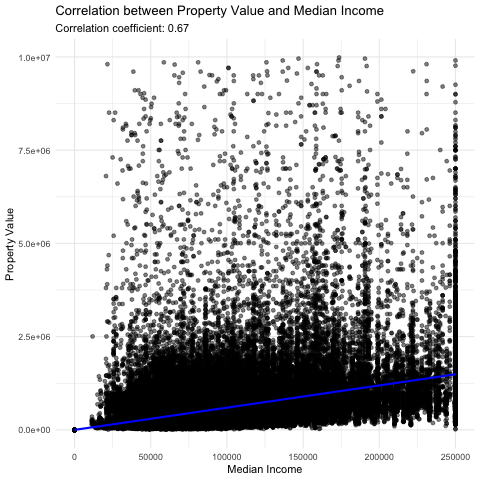

In [58]:
%%R
library(ggplot2)

# Convert the scientific notation to numeric
clean_df$property_value <- as.numeric(clean_df$property_value)

ggplot(clean_df, aes(x = med_inc, y = property_value)) +
  geom_point(alpha = 0.5) +  # Use alpha to adjust point transparency if there are many points
  theme_minimal() +
  labs(x = "Median Income", y = "Property Value",
       title = "Correlation between Property Value and Median Income",
       subtitle = paste("Correlation coefficient:", round(correlation_result, 2))) +
  geom_smooth(method = "lm", se = FALSE, color = "blue")  # Add a linear regression line